In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.linalg import solve

# Лабораторная работа 4
Вариант 4

Сутдент: Волков Матвей Андреевич

группа: М8О-307Б-19  

In [2]:
def RungeRombergMethod(Met, h, r, p):
    if (r >= 1):
        return np.abs((Met.calculate(h)[::r] - Met.calculate(h * r)) / (r ** p - 1)).tolist()
    else :
        return np.abs((Met.calculate(h) - Met.calculate(h * r)[::int(1/r)]) / (r ** p - 1)).tolist()

def get_exact_vals(exact_func, ranger, h):
    """Function generate list of exact function and also returns numerical grid
    """
    numerical_grid = np.arange(ranger[0], ranger[1] + h, h)
    return [exact_func(x) for x in numerical_grid], numerical_grid

### Часть 4_1
#### Задание: 
Реализовать методы Эйлера, Рунге-Кутты и Адамса 4-го порядка в виде программ, задавая в качестве входных данных шаг сетки h. С использованием разработанного программного обеспечения решить задачу Коши для ОДУ 2-го порядка на указанном отрезке. Оценить погрешность численного решения с использованием метода Рунге – Ромберга и путем сравнения с точным решением. 

| Задача Коши | Точное решение |
|:------:|:------:|
|$$ x^2 y'' - x(x^2-1)y'-(x^2+1)y = 0 \\ y(1) = 1+e^{1/2} \\ y'(1) = -1 \\ x \in [1, 2] \\ h = 0.1 $$|$$ y = \frac{1}{x}(1+\exp(\frac{x^2}{2})) $$|

$$y'=z$$
$$z' = \frac{x(x^2 - 1)z + (x^2+1)y}{x^2}$$
$$y(1) = 1+e^{1/2}$$
$$z(1) =  - 1$$
Метод Эйлера-Коши

In [3]:
test_func = lambda x: (1 + math.exp(x**2 / 2))/x
h = 0.1
ranger = [1,2]

dy1 = lambda x,y,z: z
dz1 = lambda x,y,z: (x*(x**2 - 1)*z + y*(x**2 + 1))/(x**2)

In [4]:
class euler_koshi:
    def __init__(self, y0, z0, ranger):
        self.ranger = ranger
        self.x0, self.y0, self.z0 = ranger[0], y0, z0

    def calculate(self, h, dz=dz1, dy=dy1):
        numerical_grid = np.arange(self.ranger[0], self.ranger[1] + h, h)
        result = np.zeros(len(numerical_grid))
        result[0] = self.y0

        #creating eps_loc for calculating error rate
        self.eps_loc = [0]

        zk = self.z0
        for i, xk in enumerate(numerical_grid[:-1]):
            z_predictor = zk + h * dz(xk, result[i], zk)
            y_predictor = result[i] + h * dy(xk, result[i], zk)

            z_corrector = zk + h * (dz(xk, result[i], zk) + dz(xk + h, y_predictor, z_predictor)) / 2
            y_corrector = result[i] + h * (dy(xk, result[i], zk) + dy(xk + h, y_predictor, z_predictor)) / 2

            zk = z_corrector
            result[i+1] = y_corrector

            self.eps_loc.append(h**2 * dz(xk + h/2, y_corrector, z_corrector) / 2)

        self.s = result
        return result

    def show_plot(self, exact_func, h):
        f, numerical_grid = get_exact_vals(exact_func, self.ranger, h)
        plt.figure(figsize = (12, 8))
        plt.plot(numerical_grid, self.s, 'bo--', label='Approximate')
        plt.plot(numerical_grid, f, 'g', label='Exact')
        plt.title('Приближенное и настоящее решение для метода Эйлера-Коши')
        plt.xlabel('t')
        plt.ylabel('f(t)')
        plt.grid()
        plt.legend(loc='lower right')
        plt.show()

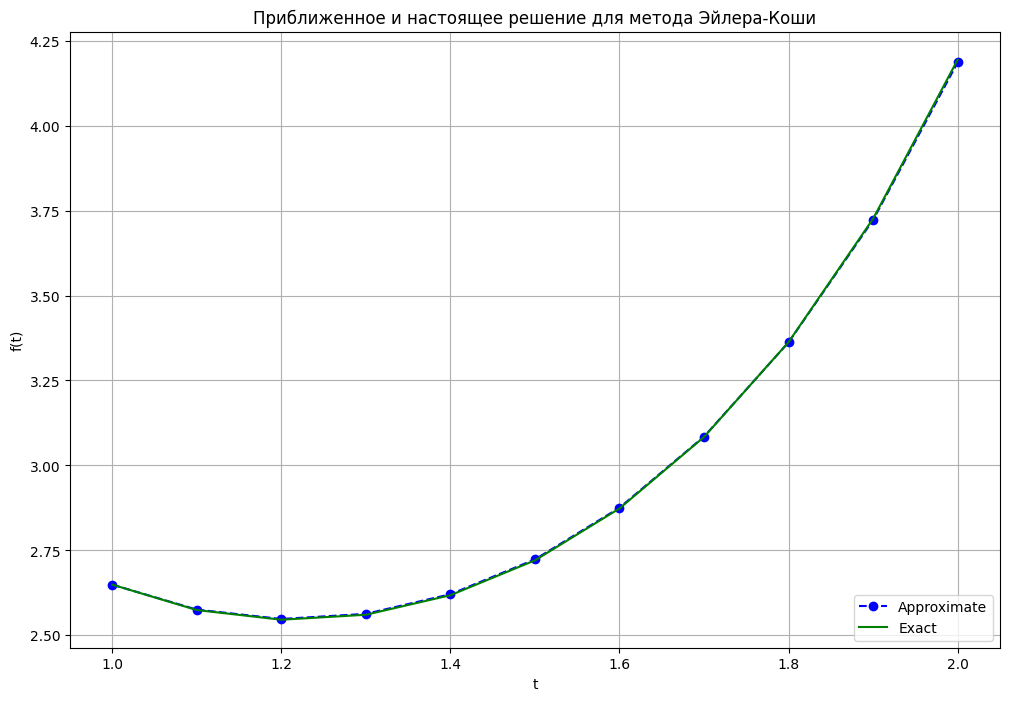

y = 2.64872 	 Euler_y = 2.64872 		 RungeRomberg: 0.00000	 Локальная погрешность: 0.00000
y = 2.57387 	 Euler_y = 2.57521 		 RungeRomberg: 0.00204	 Локальная погрешность: 0.02431
y = 2.54536 	 Euler_y = 2.54756 		 RungeRomberg: 0.00334	 Локальная погрешность: 0.02228
y = 2.55998 	 Euler_y = 2.56267 		 RungeRomberg: 0.00411	 Локальная погрешность: 0.02183
y = 2.61747 	 Euler_y = 2.62035 		 RungeRomberg: 0.00442	 Локальная погрешность: 0.02273
y = 2.72014 	 Euler_y = 2.72288 		 RungeRomberg: 0.00425	 Локальная погрешность: 0.02493
y = 2.87290 	 Euler_y = 2.87510 		 RungeRomberg: 0.00351	 Локальная погрешность: 0.02853
y = 3.08344 	 Euler_y = 3.08457 		 RungeRomberg: 0.00199	 Локальная погрешность: 0.03379
y = 3.36283 	 Euler_y = 3.36214 		 RungeRomberg: 0.00061	 Локальная погрешность: 0.04108
y = 3.72630 	 Euler_y = 3.72271 		 RungeRomberg: 0.00477	 Локальная погрешность: 0.05101
y = 4.19453 	 Euler_y = 4.18648 		 RungeRomberg: 0.01119	 Локальная погрешность: 0.06440

Погрешность решения:

In [5]:
y0 = 1 + np.exp(1/2)
z0 = -1
el = euler_koshi(y0,z0, ranger)

# вычисляем погрешность
rrm = RungeRombergMethod(el, h, 1/2, 1)

el_ans = el.calculate(h)
true_ans, _ = get_exact_vals(test_func,ranger, h)
el.show_plot(test_func, h)

for i in range(len(el_ans)):
    print(f"y = {true_ans[i]:.5f} \t Euler_y = {el_ans[i]:.5f} \t"+ 
            f"\t RungeRomberg: {rrm[i]:.5f}"  +
            f"\t Локальная погрешность: {el.eps_loc[i]:.5f}")

eps_h = math.sqrt(np.sum(np.square(el_ans - true_ans)))

print("\nПогрешность решения: ", eps_h)

Метод Рунге-Кута

In [6]:
class runge_kutta:
    def __init__(self, y0, z0, ranger):
        self.ranger = ranger
        self.x0, self.y0, self.z0 = ranger[0], y0, z0

    def calculate(self, h,dz=dz1,dy=dy1):
        numerical_grid = np.arange(self.ranger[0], self.ranger[1] + h, h)
        result = np.zeros(len(numerical_grid))
        result[0] = self.y0

        yk = self.y0
        zk = self.z0
        self.Zk = [zk]
        for i, xk in enumerate(numerical_grid[:-1]):
            L1 = h * dz(xk, yk, zk)
            K1 = h * dy(xk, yk, zk)

            L2 = h * dz(xk + h / 2, yk + K1 / 2, zk + L1 / 2)
            K2 = h * dy(xk + h / 2, yk + K1 / 2, zk + L1 / 2)
            

            L3 = h * dz(xk + h / 2, yk + K2 / 2, zk + L2 / 2)
            K3 = h * dy(xk + h / 2, yk + K2 / 2, zk + L2 / 2)

            L4 = h * dz(xk + h, yk + K3, zk + L3)
            K4 = h * dy(xk + h, yk + K3, zk + L3)

            delt_y = (K1 + 2 * K2 + 2 * K3 + K4) / 6
            delt_z = (L1 + 2 * L2 + 2 * L3 + L4) / 6

            z = zk + delt_z
            y = yk + delt_y

            yk = y
            zk = z
            self.Zk.append(zk)

            result[i+1] = yk

        self.Xi = numerical_grid
        self.s = result
        return result

    def show_plot(self, exact_func, h):
        f, numerical_grid = get_exact_vals(exact_func, self.ranger, h)
        plt.figure(figsize = (12, 8))
        plt.plot(numerical_grid, self.s, 'bo--', label='Approximate')
        plt.plot(numerical_grid, f, 'g', label='Exact')
        plt.title('Приближенное и настоящее решение для метода Рунге-Кутты')
        plt.xlabel('t')
        plt.ylabel('f(t)')
        plt.grid()
        plt.legend(loc='lower right')
        plt.show()

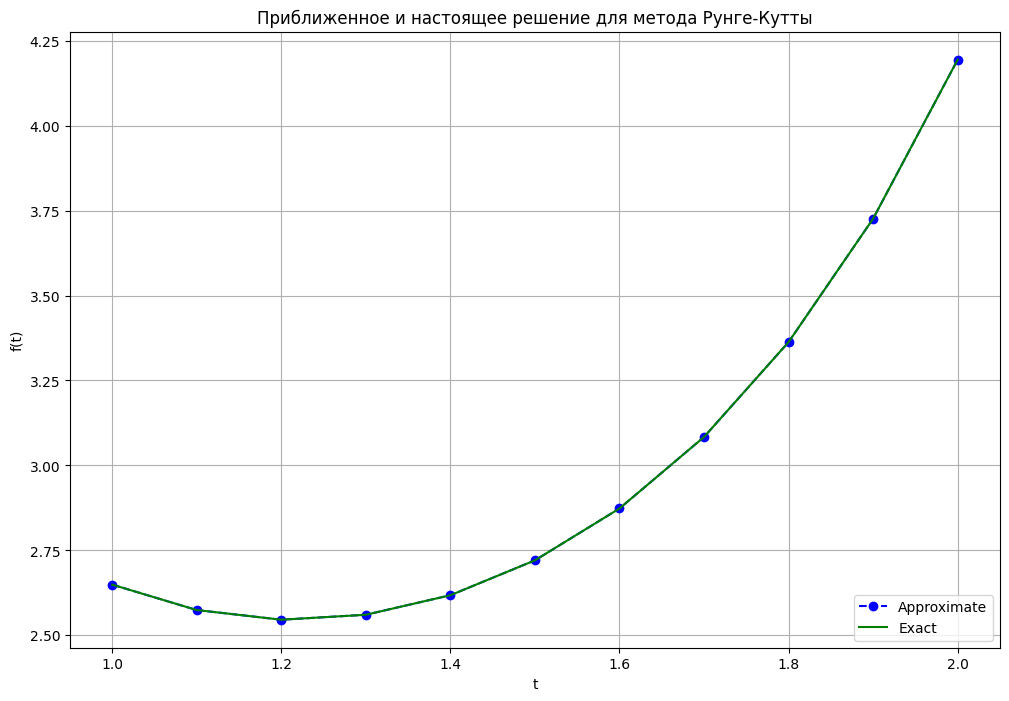

y = 2.64872 	 RungeKutta_y = 2.64872 		 RungeRomberg: 0.00000
y = 2.57387 	 RungeKutta_y = 2.57387 		 RungeRomberg: 0.00001
y = 2.54536 	 RungeKutta_y = 2.54537 		 RungeRomberg: 0.00001
y = 2.55998 	 RungeKutta_y = 2.55999 		 RungeRomberg: 0.00001
y = 2.61747 	 RungeKutta_y = 2.61748 		 RungeRomberg: 0.00002
y = 2.72014 	 RungeKutta_y = 2.72015 		 RungeRomberg: 0.00002
y = 2.87290 	 RungeKutta_y = 2.87291 		 RungeRomberg: 0.00002
y = 3.08344 	 RungeKutta_y = 3.08345 		 RungeRomberg: 0.00001
y = 3.36283 	 RungeKutta_y = 3.36283 		 RungeRomberg: 0.00001
y = 3.72630 	 RungeKutta_y = 3.72630 		 RungeRomberg: 0.00000
y = 4.19453 	 RungeKutta_y = 4.19452 		 RungeRomberg: 0.00001

Погрешность решения:  2.2433624128015156e-05


In [7]:
y0 = 1 + np.exp(1/2)
z0 = - 1
rk = runge_kutta(y0,z0, ranger)

# вычисляем погрешность
rrm = RungeRombergMethod(rk, h, 1/2, 1)

rk_ans = rk.calculate(h)
true_ans, _ = get_exact_vals(test_func,ranger, h)
rk.show_plot(test_func, h)

for i in range(len(rk_ans)):
     print(f"y = {true_ans[i]:.5f} \t RungeKutta_y = {rk_ans[i]:.5f} \t"+ 
            f"\t RungeRomberg: {rrm[i]:.5f}") 

eps_h = math.sqrt(np.sum(np.square(rk_ans - true_ans)))

print("\nПогрешность решения: ", eps_h)

Метод Адамса

In [8]:
class adams:
    def __init__(self, y0, z0, ranger):
        self.ranger = ranger
        self.x0, self.y0, self.z0 = ranger[0], y0, z0
        self.rk = runge_kutta(y0,z0,ranger)

    def calculate(self, h, dz=dz1, dy=dy1):
        result = self.rk.calculate(h)[:4]

        numerical_grid = np.arange(self.ranger[0], self.ranger[1] + h, h)

        Xk = numerical_grid[:4]
        Zk = self.rk.Zk[:4]

        for i, xk in enumerate(numerical_grid[4:]):
            z_predictor = Zk[-1] + h * (55 * dz(Xk[-1], result[-1], Zk[-1]) - 
                                             59 * dz(Xk[-2], result[-2], Zk[-2]) + 
                                             37 * dz(Xk[-3], result[-3], Zk[-3]) - 
                                             9  * dz(Xk[-4], result[-4], Zk[-4])) / 24
            
            y_predictor = result[-1] + h * (55 * dy(Xk[-1], result[-1], Zk[-1]) - 
                                             59 * dy(Xk[-2], result[-2], Zk[-2]) + 
                                             37 * dy(Xk[-3], result[-3], Zk[-3]) - 
                                             9  * dy(Xk[-4], result[-4], Zk[-4])) / 24
            

            z_corrector = Zk[-1] + h * (9 * dz(xk + h, y_predictor, z_predictor) + 
		                                    19 * dz(Xk[-1] + h, result[-1], Zk[-1]) - 
		                                    5  * dz(Xk[-2] + h, result[-2], Zk[-2]) + 
		                                         dz(Xk[-3] + h, result[-3], Zk[-3])) / 24
            
            y_corrector = result[-1] + h * (9 * dy(xk + h, y_predictor, z_predictor) + 
		                           19 * dy(Xk[-1] + h, result[-1], Zk[-1]) - 
		                           5  * dy(Xk[-2] + h, result[-2], Zk[-2]) + 
		                                dy(Xk[-3] + h, result[-3], Zk[-3])) / 24

            Zk.append(z_corrector)
            Xk = np.append(Xk, xk)
            result = np.append(result, y_corrector)

        self.s = result
        return result

    def show_plot(self, exact_func, h):
        f, numerical_grid = get_exact_vals(exact_func, self.ranger, h)
        plt.figure(figsize = (12, 8))
        plt.plot(numerical_grid, self.s, 'bo--', label='Approximate')
        plt.plot(numerical_grid, f, 'g', label='Exact')
        plt.title('Приближенное и настоящее решение для метода Адамса')
        plt.xlabel('t')
        plt.ylabel('f(t)')
        plt.grid()
        plt.legend(loc='lower right')
        plt.show()

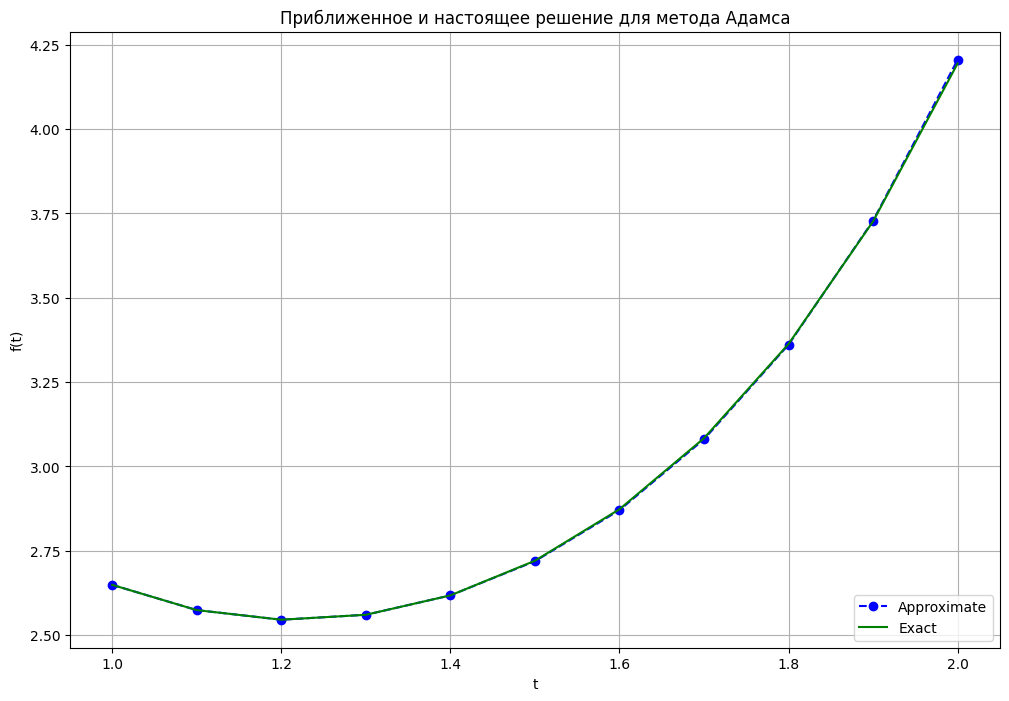

y = 2.64872 	 Adams_y = 2.64872 		 RungeRomberg: 0.00000
y = 2.57387 	 Adams_y = 2.57387 		 RungeRomberg: 0.00001
y = 2.54536 	 Adams_y = 2.54537 		 RungeRomberg: 0.00002
y = 2.55998 	 Adams_y = 2.55999 		 RungeRomberg: 0.00256
y = 2.61747 	 Adams_y = 2.61740 		 RungeRomberg: 0.00703
y = 2.72014 	 Adams_y = 2.71878 		 RungeRomberg: 0.01038
y = 2.87290 	 Adams_y = 2.87023 		 RungeRomberg: 0.01434
y = 3.08344 	 Adams_y = 3.08020 		 RungeRomberg: 0.01976
y = 3.36283 	 Adams_y = 3.36074 		 RungeRomberg: 0.02784
y = 3.72630 	 Adams_y = 3.72839 		 RungeRomberg: 0.04015
y = 4.19453 	 Adams_y = 4.20554 		 RungeRomberg: 0.05881

Погрешность решения:  0.012231574188804432


In [9]:
y0 = 1 + np.exp(1/2)
z0 = - 1
ad = adams(y0,z0, ranger)

# вычисляем погрешность
rrm = RungeRombergMethod(ad, h, 1/2, 1)

ad_ans = ad.calculate(h)
true_ans, _ = get_exact_vals(test_func,ranger, h)
ad.show_plot(test_func, h)

for i in range(len(ad_ans)):
     print(f"y = {true_ans[i]:.5f} \t Adams_y = {ad_ans[i]:.5f} \t"+ 
            f"\t RungeRomberg: {rrm[i]:.5f}") 

eps_h = math.sqrt(np.sum(np.square(ad_ans - true_ans)))

print("\nПогрешность решения: ", eps_h)

### Часть 4_2
#### Задание: 
Реализовать метод стрельбы и конечно-разностный метод решения краевой задачи для ОДУ в виде программ. С использованием разработанного программного обеспечения решить краевую задачу для обыкновенного дифференциального уравнения 2-го порядка на указанном отрезке. Оценить погрешность численного решения с использованием метода Рунге – Ромберга и путем сравнения с точным решением. 

| Краевая задача | Точное решение |
|:------:|:------:|
|$$ x^2(x+1)y'' - 2y = 0 \\ y(1)=1+4ln2 \\ y(2) = 3ln3 $$|$$ y = -1 +\frac{2}{x} + \frac{2(x+1)}{x} \ln\|x+1\| $$ |

$$ 
y'' = \frac{2y}{x^2(x+1)} \\
y(1) = 1 +4 ln2 \\ 
y(2) = 3 ln3 \\
$$

$$ 
y' = z \\
z' = \frac{2y}{x^2(x+1)} \\
y(1) = 1 +4 ln2 \\ 
y(2) = 3 ln3
$$

In [10]:
test_function_2 = lambda x: -1 + 2/x + (2*(x+1))/x * np.log(np.abs(x+1))
dy2 = lambda x,y,z : z
dz2 = lambda x,y,z : 2*y/(x**2 * (x + 1))

Метод стрельбы

In [17]:
class Shooting:
    def __init__(self, mu1, mu2, ranger, y0, yn):
        self.mu1 = mu1
        self.mu2 = mu2
        self.ranger = ranger
        self.y0 = y0
        self.yn = yn

    def calculate(self, h):
        eps = 0.000001

        mu1 = self.mu1
        mu2 = self.mu2
        rk1 = runge_kutta(y0 = self.y0, z0 = mu1, ranger=self.ranger)
        rk2 = runge_kutta(y0 = self.y0, z0 = mu2, ranger=self.ranger)
        rk1_solve = rk1.calculate(h, dz = dz2, dy =dy2)
        rk2_solve = rk2.calculate(h, dz = dz2, dy =dy2)


        phi1 = rk1_solve[-1] - self.yn
        phi2 = rk2_solve[-1] - self.yn

        while np.abs(phi1 - phi2) > eps:
            #метод секущих
            mu3 = mu2 - (mu2 - mu1)/(phi2 - phi1) * (phi2)

            phi1 = phi2
            mu1 = mu2
            mu2 = mu3

            rk = runge_kutta(y0 = self.y0, z0 = mu3, ranger=self.ranger)
            rk_solve = rk.calculate(h, dz = dz2, dy =dy2)
            
            phi2 = rk_solve[-1] - self.yn 

        self.Xi = rk.Xi
        self.s = rk.s
        self.mu = mu2
        return np.array(self.s)

    def show_plot(self, exact_func, h):
        f, numerical_grid = get_exact_vals(exact_func, self.ranger, h)
        plt.figure(figsize = (12, 8))
        plt.plot(np.linspace(self.ranger[0],self.ranger[1], len(self.s)), self.s, 'bo--', label='Approximate')
        plt.plot(numerical_grid, f, 'g', label='Exact')
        plt.title('Метод стрельбы')
        plt.xlabel('t')
        plt.ylabel('f(t)')
        plt.grid()
        plt.legend(loc='lower right')
        plt.show()

Метод стрельбы
y'(1) = mu = -1.4492742186389063
y'(1) = -1.3862943611198906
Ошибка Рунге Ромберга: [0.0, 2.651082412263861e-06, 3.771192619517194e-06, 4.079845592919185e-06, 3.9367160704628645e-06, 3.5310271924160475e-06, 2.9667031107294406e-06, 2.302947110344178e-06, 1.5745629093899538e-06, 8.02576714420411e-07, 8.881784197001252e-16]


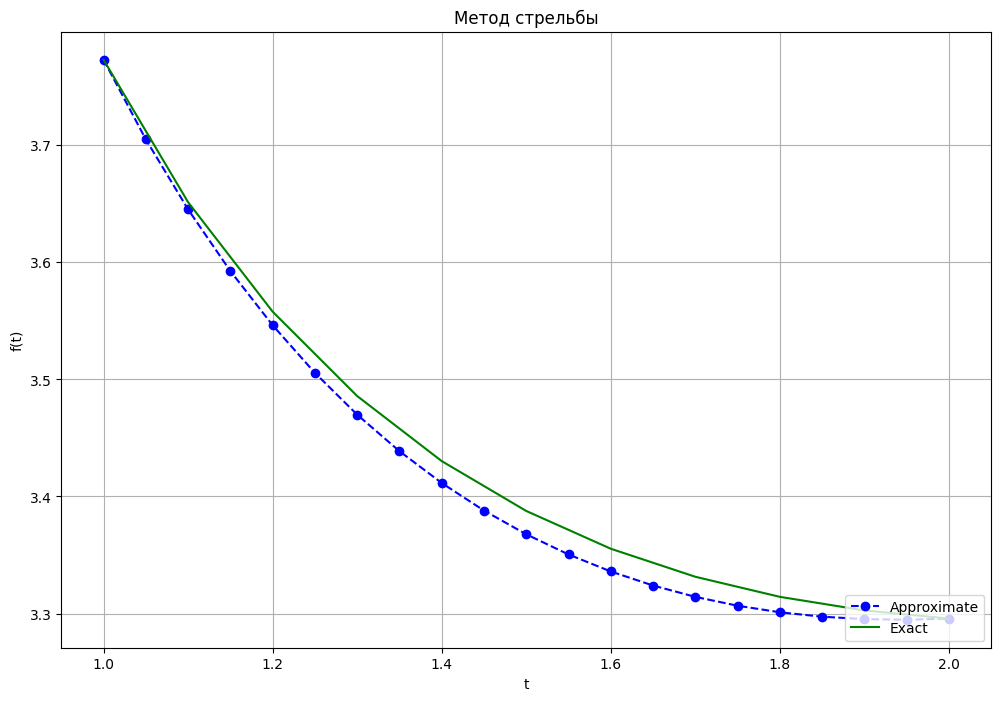

In [20]:
y0 = 1 + 4*np.log(2)
yn = 3*np.log(3)
sh = Shooting(1, 2.5, [1,2], y0, yn)

Yi = sh.calculate(0.0001)
Xi = sh.Xi

print("Метод стрельбы")
print(f"y'(1) = mu = {sh.mu}\ny'(1) = {-np.log(4)}")

print(f"Ошибка Рунге Ромберга: {RungeRombergMethod(sh, 0.1, 1/2, 1)}")

sh.show_plot(test_function_2, 0.1)

Метод конечных разностей

Будем рассматривать функцию вида
$y''+p(x)y'+q(x)y = f(x)$ , где
 
$$y(1) = 1 +4 ln2,\quad y(2) = 3 ln3$$

$$ 
x^2(x+1)y'' - 2y = 0 $$
$$ y'' + \frac{-2}{x^2(x+1)}y = 0 $$

$$ p(x) = 0 $$
$$ q(x) = \frac{-2}{x^2(x+1)} $$
$$ f(x) = 0$$

In [13]:
q = lambda x: -2 / ((x+1) * (x**2))
p = lambda x: 0

In [14]:
def TDMAsolver(A, _d) -> np.array:
    """Функция, решающая систему с трехдиагональной матрицей

    Args:
        A (list, np.array): Трехдиагональная матрица
        d (list, np.array): Столбец правой части системы

    Returns:
        np.array: Решение системы.
    """
    n = len(_d)
    a = []
    b = []
    c = []
    d = _d
    A = A

    a.append(0)
    b.append(A[0][0])
    c.append(A[0][1])
    for i in range(1, n - 1):
        a.append(A[i][i - 1])
        b.append(A[i][i])
        c.append(A[i][i + 1])

    a.append(A[n - 1][n - 2])
    b.append(A[n - 1][n - 1])
    c.append(0)

    # создаем P и Q
    p = []
    q = []
    p.append(- c[0] / b[0])
    q.append(d[0] / b[0])

    for i in range(1, n - 1):
        p.append(- c[i] / (b[i] + a[i] * p[i - 1]))
        q.append((d[i] - a[i] * q[i - 1]) / (b[i] + a[i] * p[i - 1]))

    # считаем ответ
    ans = np.zeros(n)

    ans[n - 1] = (d[n - 1] - a[n - 1] * q[n - 2]) / (b[n - 1] + a[n - 1] * p[n - 2])

    for i in range(n - 2, -1, -1):
        ans[i] = p[i] * ans[i + 1] + q[i]

    return ans.tolist()

In [15]:
class diff_end_method:
    def __init__(self, ranger, y0, yn) -> None:
        self.ranger = ranger
        self.y0 = y0
        self.yn = yn

    def calculate(self, n):
        x0, xn = self.ranger

        h = (xn - x0) / n

        Xk = np.arange(x0, xn + h, h)

        A = np.zeros((n + 1, n + 1))
        b = np.zeros(n + 1)

        A[0][0] = 1
        A[0][1] = 0
        b[0] = self.y0

        for i in range(1, n):

            A[i][i - 1] = 1 / h**2 - p(Xk[i]) / (2*h)
            A[i][i] = -2 / h**2 + q(Xk[i])
            A[i][i + 1] = 1 / h**2 + p(Xk[i]) / (2*h)

        A[n][n-1] = 0
        A[n][n] = 1
        b[n] = self.yn

        result = TDMAsolver(A, b)
        self.s = result

        return np.array(result)

    def show_plot(self, exact_func, h):
        f, numerical_grid = get_exact_vals(exact_func, self.ranger, h)
        plt.figure(figsize = (12, 8))
        plt.plot(np.linspace(self.ranger[0],self.ranger[1], len(self.s)), self.s, 'bo--', label='Approximate')
        plt.plot(numerical_grid, f, 'g', label='Exact')
        plt.title('Конечно-разностный метод')
        plt.xlabel('t')
        plt.ylabel('f(t)')
        plt.grid()
        plt.legend(loc='lower right')
        plt.show()

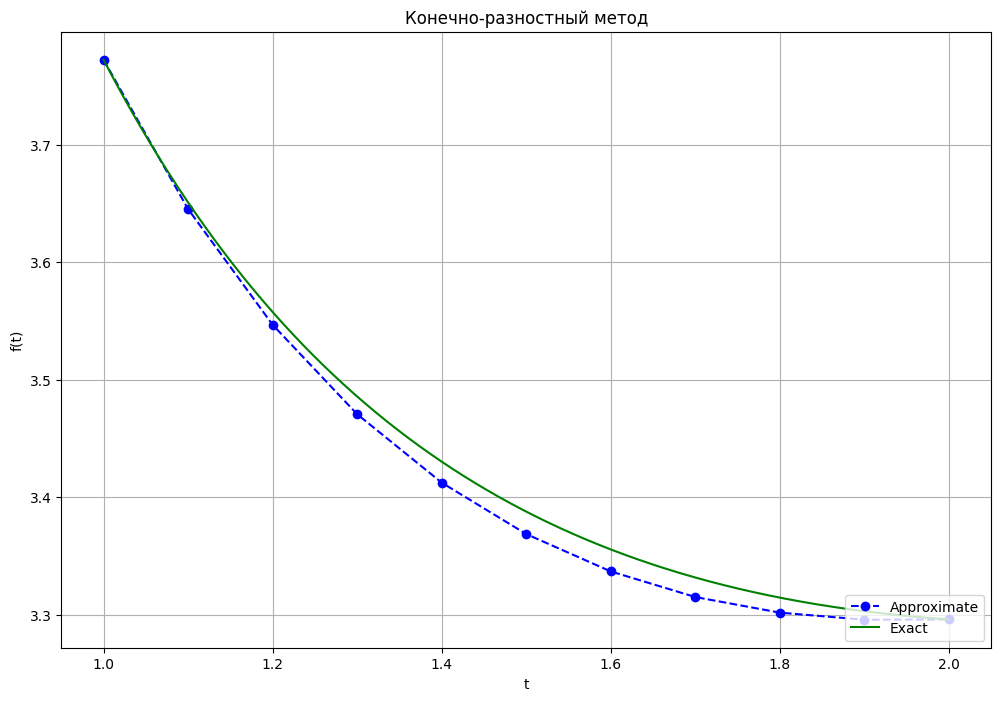

In [16]:
y0 = 1 + 4*np.log(2)
yn = 3*np.log(3)
de_method = diff_end_method([1,2], y0, yn)
ans = de_method.calculate(10)

de_method.show_plot(test_function_2, 0.001)
# print(f"Ошибка Рунге Ромберга: {RungeRombergMethod(de_method, 50, 2, 1)}")